In [47]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt
 
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten
 
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter)
from dataclasses import dataclass

In [48]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
 
print(X_train.shape)
print(X_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [49]:
X_train = X_train.astype("float32") / 255
X_test  = X_test.astype("float32") / 255
y_train = to_categorical(y_train)
y_test  = to_categorical(y_test)

In [50]:
model = Sequential()
    
#------------------------------------
# Conv Block 1: 32 Filters, MaxPool.
#------------------------------------
model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=(32,32,3)))
model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

#------------------------------------
# Conv Block 2: 64 Filters, MaxPool.
#------------------------------------
model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

#------------------------------------
# Conv Block 3: 64 Filters, MaxPool.
#------------------------------------
model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
    
#------------------------------------
# Flatten the convolutional features.
#------------------------------------
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [51]:
model.summary()
model.compile(optimizer='rmsprop', 
            loss='categorical_crossentropy', 
            metrics=['accuracy'],
            )


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_30 (Conv2D)              │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_31 (Conv2D)              │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_32 (Conv2D)              │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_33 (Conv2D)              │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_34 (Conv2D)              │ (None, 8, 8, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_35 (Conv2D)              │ (None, 8, 8, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 669,354 (2.55 MB)

 Trainable params: 669,354 (2.55 MB)

 Non-trainable params: 0 (0.00 B)

In [52]:
history = model.fit(X_train,
        y_train,
        batch_size=256, 
        epochs=31, 
        verbose=1, 
        validation_split=.3,
        )

Epoch 1/31
137/137 ━━━━━━━━━━━━━━━━━━━━ 12s 82ms/step - accuracy: 0.1628 - loss: 2.2494 - val_accuracy: 0.1679 - val_loss: 2.5942
Epoch 2/31
137/137 ━━━━━━━━━━━━━━━━━━━━ 11s 84ms/step - accuracy: 0.3224 - loss: 1.8775 - val_accuracy: 0.4017 - val_loss: 1.6501
Epoch 3/31
137/137 ━━━━━━━━━━━━━━━━━━━━ 12s 87ms/step - accuracy: 0.3962 - loss: 1.6600 - val_accuracy: 0.4745 - val_loss: 1.4353
Epoch 4/31
137/137 ━━━━━━━━━━━━━━━━━━━━ 12s 89ms/step - accuracy: 0.4542 - loss: 1.5086 - val_accuracy: 0.5163 - val_loss: 1.3258
Epoch 5/31
137/137 ━━━━━━━━━━━━━━━━━━━━ 12s 91ms/step - accuracy: 0.4932 - loss: 1.4071 - val_accuracy: 0.5393 - val_loss: 1.2499
Epoch 6/31
137/137 ━━━━━━━━━━━━━━━━━━━━ 12s 91ms/step - accuracy: 0.5279 - loss: 1.3117 - val_accuracy: 0.5471 - val_loss: 1.2932
Epoch 7/31
137/137 ━━━━━━━━━━━━━━━━━━━━ 12s 91ms/step - accuracy: 0.5583 - loss: 1.2223 - val_accuracy: 0.5459 - val_loss: 1.2623
Epoch 8/31
137/137 ━━━━━━━━━━━━━━━━━━━━ 12s 90ms/step - accuracy: 0.5853 - loss: 1.1453 - 

In [53]:
def plot_results(metrics, title=None, ylabel=None, ylim=None, metric_name=None, color=None):
     
    fig, ax = plt.subplots(figsize=(15, 4))
 
    if not (isinstance(metric_name, list) or isinstance(metric_name, tuple)):
        metrics = [metrics,]
        metric_name = [metric_name,]
         
    for idx, metric in enumerate(metrics):    
        ax.plot(metric, color=color[idx])
     
    plt.xlabel("Epoch")
    plt.ylabel(ylabel)
    plt.title(title)
    plt.xlim([0, 30])
    plt.ylim(ylim)
    # Tailor x-axis tick marks
    ax.xaxis.set_major_locator(MultipleLocator(5))
    ax.xaxis.set_major_formatter(FormatStrFormatter('%d'))
    ax.xaxis.set_minor_locator(MultipleLocator(1))
    plt.grid(True)
    plt.legend(metric_name)   
    plt.show()
    plt.close()

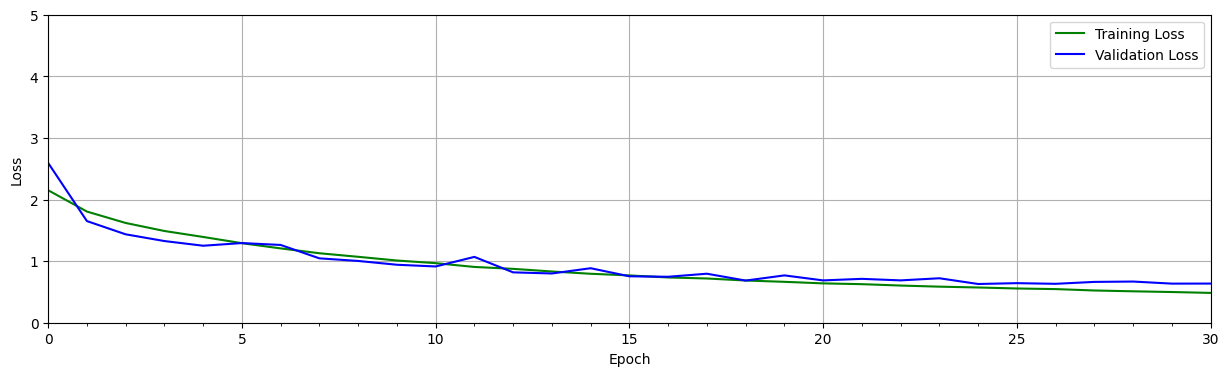

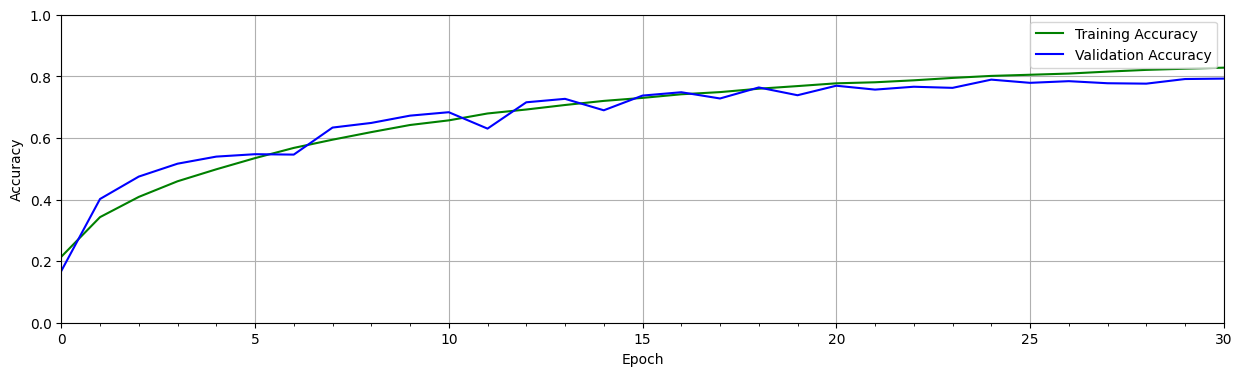

In [55]:
train_loss = history.history["loss"]
train_acc  = history.history["accuracy"]
valid_loss = history.history["val_loss"]
valid_acc  = history.history["val_accuracy"]
     
plot_results([ train_loss, valid_loss ],        
            ylabel="Loss", 
            ylim = [0.0, 5.0],
            metric_name=["Training Loss", "Validation Loss"],
            color=["g", "b"]);
 
plot_results([ train_acc, valid_acc ], 
            ylabel="Accuracy",
            ylim = [0.0, 1.0],
            metric_name=["Training Accuracy", "Validation Accuracy"],
            color=["g", "b"])

In [56]:

test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc*100:.3f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7889 - loss: 0.6507
Test accuracy: 78.800


In [59]:
model.save('cifar-10_model.keras')

In [63]:
from tensorflow.keras import models
reloaded_model = models.load_model('cifar-10_model.keras')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
Prediction accuracy:  0.88


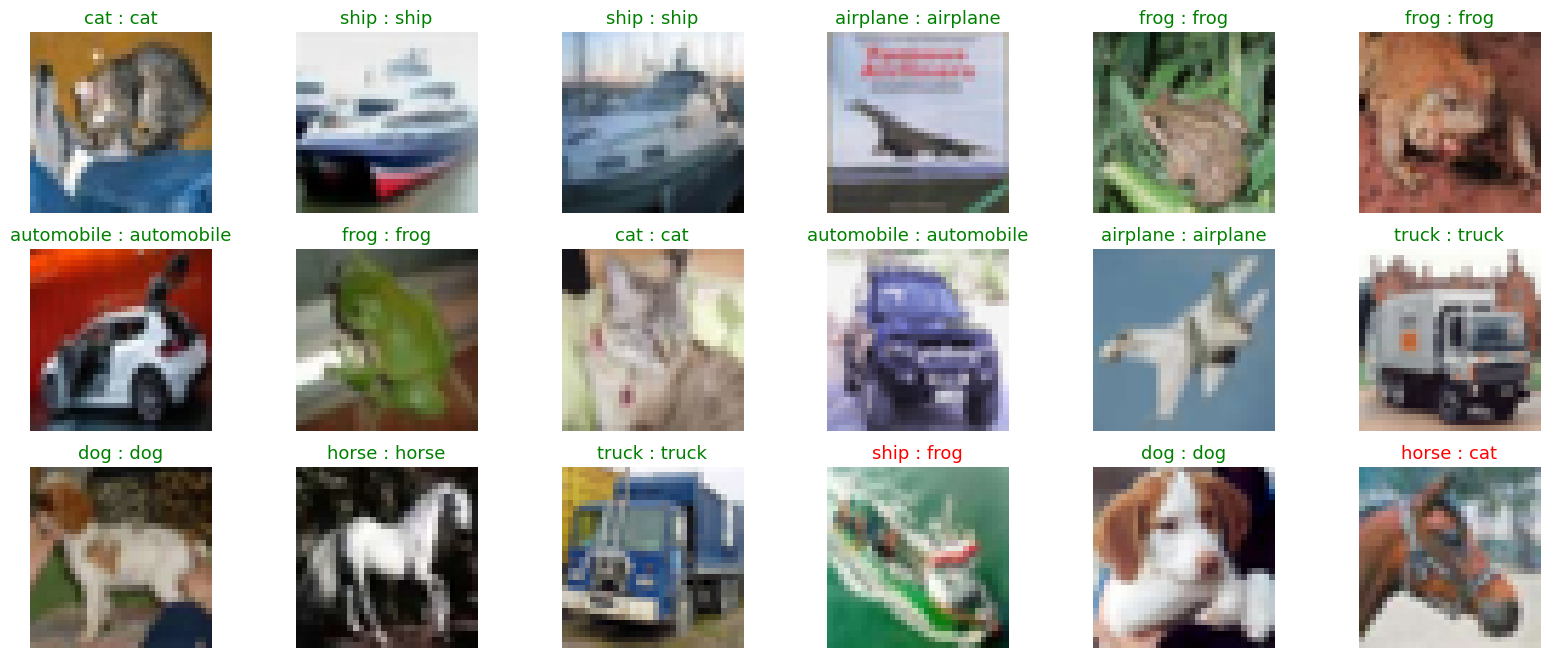

In [ ]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck' ]
num_rows = 3
num_cols = 6
    
data_batch = X_test[0:num_rows*num_cols]

predictions = reloaded_model.predict(data_batch)

plt.figure(figsize=(20, 8))
num_matches = 0
        
for idx in range(num_rows*num_cols):
    ax = plt.subplot(num_rows, num_cols, idx + 1)
    plt.axis("off")
    plt.imshow(data_batch[idx])

    pred_idx = tf.argmax(predictions[idx]).numpy()
    truth_idx = np.nonzero(y_test[idx])
            
    title = str(class_names[truth_idx[0][0]]) + " : " + str(class_names[pred_idx])
    title_obj = plt.title(title, fontdict={'fontsize':13})
            
    if pred_idx == truth_idx:
        num_matches += 1
        plt.setp(title_obj, color='g')
    else:
        plt.setp(title_obj, color='r')
                
    acc = num_matches/(idx+1)
print("Prediction accuracy: ", int(100*acc)/100)

In [65]:
import cv2
def load_and_preprocess_images(folder_path):
    images = []
    filenames = []  
    for filename in os.listdir(folder_path):
        if filename.endswith(('.jpg', '.jpeg', '.png')): 
            img_path = os.path.join(folder_path, filename)
            img = cv2.imread(img_path)
            if img is not None: 
                img = cv2.resize(img, (32, 32)) 
                img = img.astype("float32") / 255.0 
                images.append(img)
                filenames.append(filename) 
    return np.array(images), filenames

In [66]:
folder_path = "image"  # Replace with the actual path to your image folder
images, filenames = load_and_preprocess_images(folder_path)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
Image: airplane1.jpg, Predicted Class: airplane
Image: airplane2.jpg, Predicted Class: cat
Image: airplane3.jpg, Predicted Class: bird
Image: airplane4.jpg, Predicted Class: bird
Image: airplane5.jpg, Predicted Class: frog
Image: automobile1.jpg, Predicted Class: automobile
Image: automobile2.jpg, Predicted Class: automobile
Image: automobile3.jpg, Predicted Class: automobile
Image: automobile4.jpg, Predicted Class: automobile
Image: automobile5.jpg, Predicted Class: automobile
Image: frog1.jpg, Predicted Class: frog
Image: frog2.jpg, Predicted Class: frog
Image: frog3.jpg, Predicted Class: automobile
Image: frog4.jpg, Predicted Class: frog
Image: frog5.jpg, Predicted Class: automobile


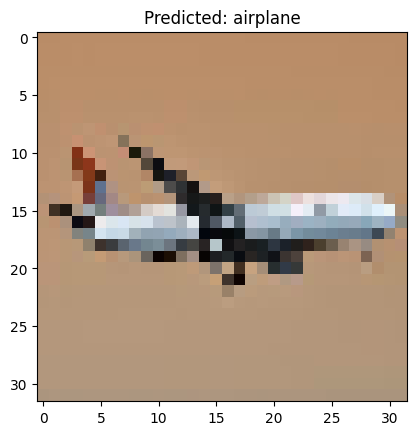

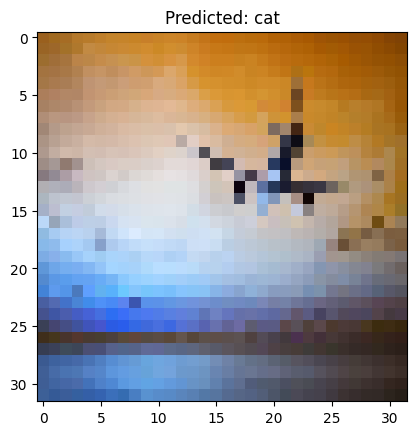

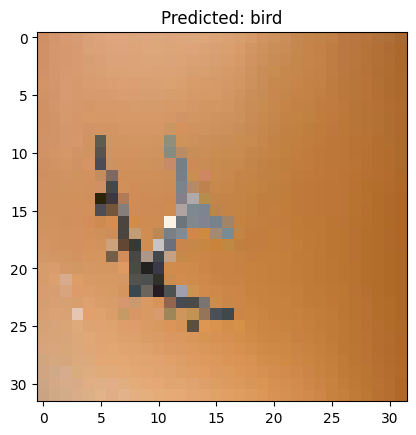

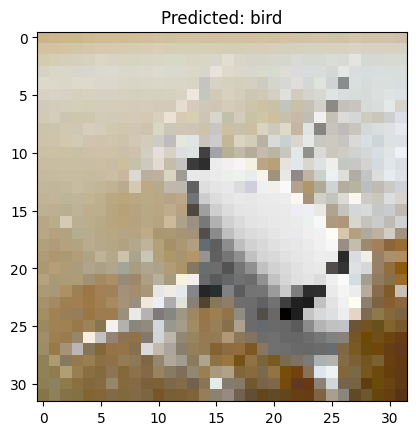

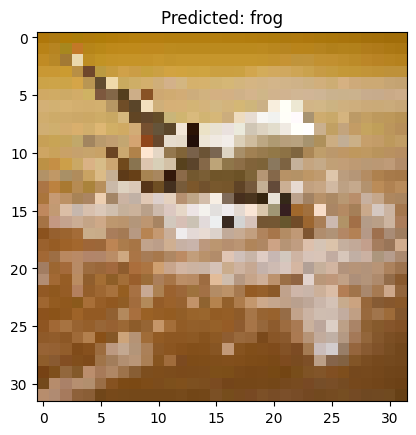

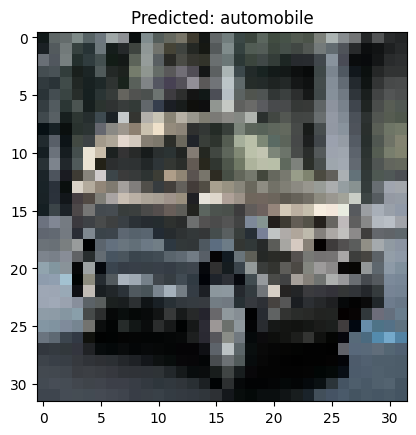

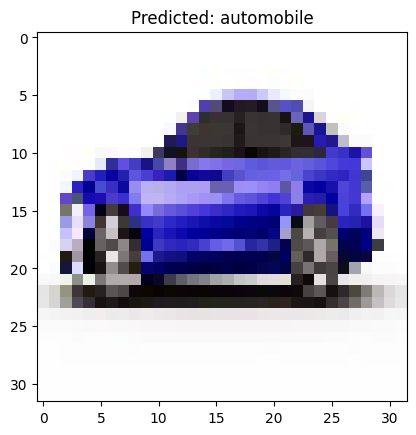

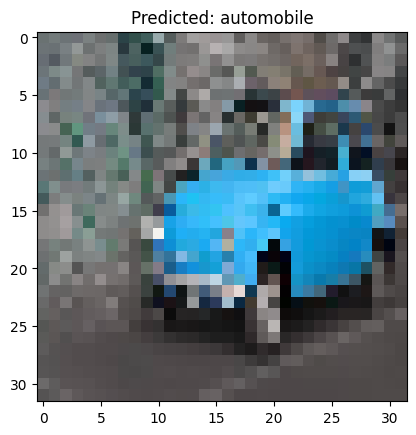

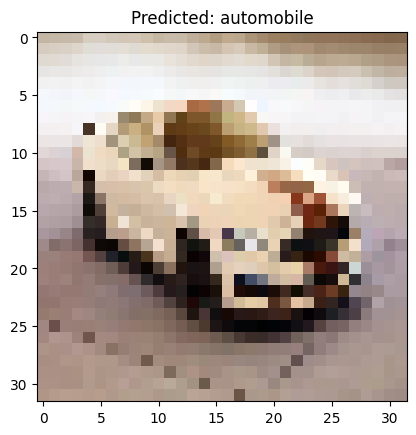

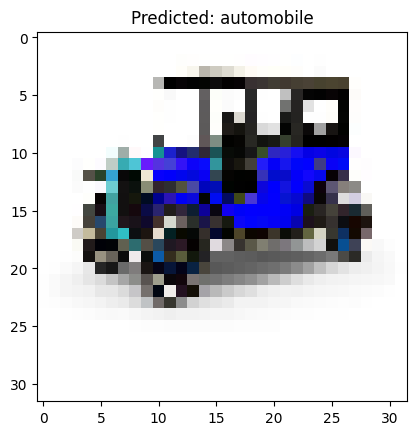

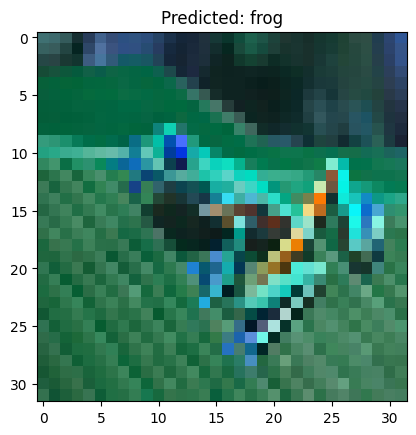

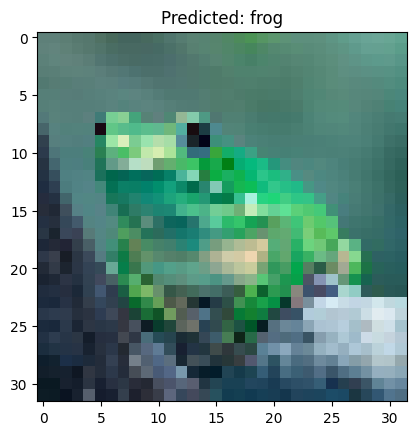

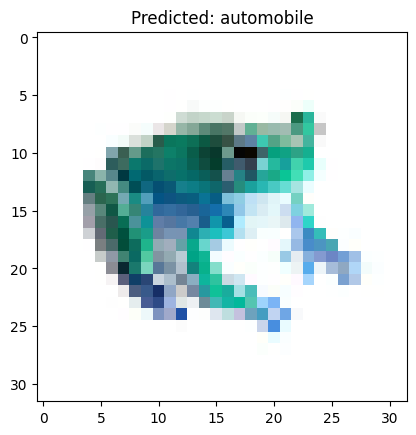

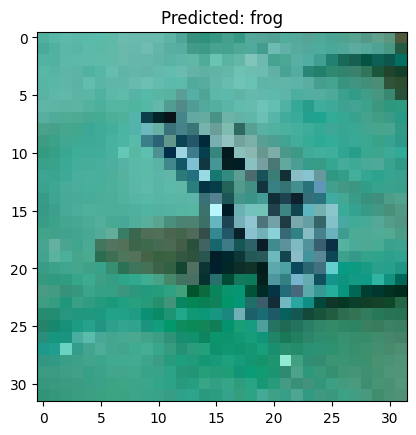

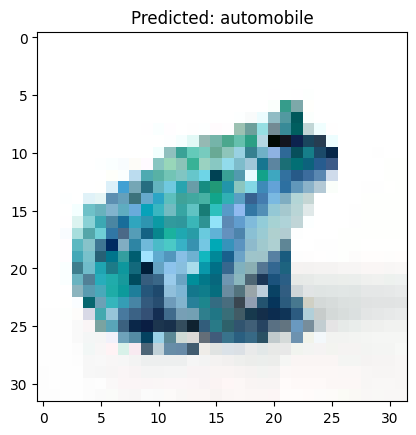

In [ ]:
predictions = reloaded_model.predict(images)
predicted_classes = np.argmax(predictions, axis=1)  

for i, filename in enumerate(filenames):
    print(f"Image: {filename}, Predicted Class: {class_names[predicted_classes[i]]}")

for i in range(len(images)):
    plt.imshow(images[i])
    plt.title(f"Predicted: {class_names[predicted_classes[i]]}")
    plt.show()